In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import lightgbm as lgb
from sklearn.svm import NuSVR
from sklearn.model_selection import train_test_split
import os
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
np.random.seed(31415)

def calculate_metrics(y_true, y_pred):    
    r2 = r2_score(y_true, y_pred)
    print(" R2 of the model is ", r2)
    rms = sqrt(mean_squared_error(y_true, y_pred))
    print(" RMSE of the model is ", rms)
    mae = mean_absolute_error(y_true, y_pred)
    print(" MAE of the model is ", mae)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(" MAPE of the model is ", mape)
    
def make_plot(y_test, y_pred):
    plt.figure(figsize=(15, 5))
    plt.plot(y_pred)
    plt.plot(y_test.values)
    plt.legend(['Predicted', 'Actual'])
    
def make_scatterplot(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')


DATA_PATH = "./Simulations/"
datapoints = {}

for root, dirs, files in os.walk(DATA_PATH):
    if 'FormFactor.json' in files:
        simul_id = root[len(DATA_PATH):]
        
        f = open(root + '/FormFactor.json')
        data = json.load(f)
        form_factor = pd.DataFrame(data)[1]
        
        if 'thickness.json' in files:
            f = open(root + '/thickness.json')
            thickness = json.load(f)
        else:
            thickness = np.nan
            
        if 'apl.json' in files:
            f = open(root + '/apl.json')
            data = json.load(f)
            
            value_mean = np.mean(list(data.values()))
            
            if np.isnan(value_mean):
                apl = np.nan
                apl_len = np.nan
            else:
                apl = value_mean
                apl_len = len(list(data.values()))
        else:
            apl = np.nan
            apl_len = np.nan
            
        if 'TotalDensity.json' in files:
            f = open(root + '/TotalDensity.json')
            data = json.load(f)
            
            total_density = pd.DataFrame(data)
            total_density_len = total_density.shape[0]
        else:
            total_density = np.nan
            total_density_len = np.nan
            
        result = {
            'form_factor': form_factor,
            'thickness': thickness,
            'apl': apl,
            'apl_len': apl_len,
            'total_density': total_density,
            'total_density_len': total_density_len
        }
        
        datapoints[simul_id] = result

/home/ayush/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ayush/.local/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
datapoints['28-0d5-d1d-0d5d1dcb43e775faf4e53c4f9ff255a67481bd38-9b487701b24d3fad83991e311188b08d3d5ea768'].keys()

dict_keys(['form_factor', 'thickness', 'apl', 'apl_len', 'total_density', 'total_density_len'])

In [5]:
datapoints['28-0d5-d1d-0d5d1dcb43e775faf4e53c4f9ff255a67481bd38-9b487701b24d3fad83991e311188b08d3d5ea768']['total_density'].shape

(180, 2)

In [6]:
len(datapoints.keys())

715

In [7]:
form_factor = []
thickness = []
apl = []

for key in datapoints:
    if not np.isnan(datapoints[key]['thickness']):
        form_factor.append(datapoints[key]['form_factor'])
        thickness.append(datapoints[key]['thickness'])

In [8]:
len(form_factor)

711

In [9]:
form_factor = np.array(form_factor)

In [10]:
form_factor.shape

(711, 1000)

In [11]:
df = pd.DataFrame(form_factor)
df['thickness'] = thickness

In [12]:
df_copy=df

In [13]:
x = df[['thickness']]

In [14]:
y = df.drop(['thickness'],axis=1)

In [15]:
y

0          1          2          3          4          5    \
0     6.344403   6.320138   6.247351   6.126077   5.956366   5.738296   
1    22.490975  22.459825  22.366391  22.210718  21.992883  21.712994   
2    13.783229  13.762646  13.700906  13.598035  13.454075  13.269087   
3    21.447578  21.483182  21.589971  21.767875  22.016780  22.336524   
4    13.997836  13.973720  13.901380  13.780851  13.612188  13.395470   
..         ...        ...        ...        ...        ...        ...   
706  75.019056  74.984627  74.881354  74.709289  74.468513  74.159143   
707  92.289343  92.246671  92.118676  91.905425  91.607026  91.223633   
708  51.763699  51.740017  51.668979  51.550611  51.384957  51.172078   
709  71.950184  71.915288  71.810614  71.636207  71.392140  71.078515   
710  39.080416  39.050154  38.959379  38.808131  38.596476  38.324504   

           6          7          8          9    ...       990       991  \
0     5.471964   5.157489   4.795020   4.384730  ...  0.680424  0.707091   
1    21.371188  20.967635  20.502534  19.976114  ...  4.380145  4.377129   
2    13.043148  12.776350  12.468807  12.120644  ...  2.249947  2.218988   
3    22.726898  23.187651  23.718482  24.319047  ...  2.408326  2.474208   
4    13.130795  12.818287  12.458089  12.050368  ...  0.242800  0.235561   
..         ...        ...        ...        ...  ...       ...       ...   
706  73.781326  73.335246  72.821115  72.239182  ...  1.208284  1.180976   
707  90.755444  90.202699  89.565682  88.844720  ...  9.335528  9.133224   
708  50.912051  50.604972  50.250954  49.850127  ...  3.539732  3.460534   
709  70.695464  70.243148  69.721756  69.131507  ...  1.276403  1.347048   
710  37.992333  37.600108  37.147996  36.636194  ...  2.973290  3.101561   

          992       993       994       995       996       997       998  \
0    0.735799  0.766320  0.798438  0.831960  0.866705  0.902513  0.939236   
1    4.372789  4.367126  4.360142  4.351838  4.342218  4.331287  4.319049   
2    2.187594  2.155785  2.123578  2.090991  2.058044  2.024753  1.991138   
3    2.538082  2.599919  2.659692  2.717376  2.772949  2.826390  2.877679   
4    0.228223  0.220795  0.213286  0.205709  0.198076  0.190400  0.182700   
..        ...       ...       ...       ...       ...       ...       ...   
706  1.154276  1.128200  1.102765  1.077986  1.053877  1.030453  1.007729   
707  8.931639  8.730875  8.531033  8.332216  8.134524  7.938056  7.742911   
708  3.380503  3.299691  3.218150  3.135933  3.053098  2.969702  2.885806   
709  1.417474  1.487645  1.557526  1.627084  1.696287  1.765104  1.833502   
710  3.228906  3.355279  3.480632  3.604919  3.728096  3.850117  3.970941   

          999  
0    0.976743  
1    4.305511  
2    1.957217  
3    2.926800  
4    0.174993  
..        ...  
706  0.985716  
707  7.549186  
708  2.801474  
709  1.901452  
710  4.090523  

[711 rows x 1000 columns]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(y, x, test_size=0.30, random_state=3)

In [17]:
X_train

0          1          2          3          4          5    \
683  30.243649  30.222959  30.160896  30.057484  29.912759  29.726775   
211  15.608165  15.581932  15.503246  15.372140  15.188670  14.952918   
16   38.608844  38.584945  38.513256  38.393803  38.226628  38.011789   
8    44.793382  44.775384  44.721398  44.631443  44.505548  44.343760   
685  38.550151  38.526036  38.453698  38.333164  38.164477  37.947699   
..         ...        ...        ...        ...        ...        ...   
659  99.293898  99.264194  99.175093  99.026629  98.818860  98.551864   
256  34.421472  34.397159  34.324230  34.202713  34.032658  33.814132   
643  35.707526  35.691944  35.645199  35.567303  35.458274  35.318139   
249  45.136668  45.104980  45.009929  44.851553  44.629915  44.345105   
664  90.833045  90.793839  90.676238  90.480292  90.206086  89.853736   

           6          7          8          9    ...       990       991  \
683  29.499600  29.231315  28.922019  28.571825  ...  1.418072  1.440353   
211  14.664984  14.324994  13.933095  13.489456  ...  1.020590  1.093957   
16   37.749364  37.439444  37.082140  36.677577  ...  2.717158  2.736302   
8    44.146134  43.912738  43.643656  43.338979  ...  0.017372  0.019730   
685  37.682906  37.370196  37.009679  36.601487  ...  0.530550  0.565889   
..         ...        ...        ...        ...  ...       ...       ...   
659  98.225745  97.840627  97.396658  96.894007  ...  3.075976  3.078319   
256  33.547223  33.232037  32.868701  32.457360  ...  0.437434  0.439854   
643  35.146931  34.944691  34.711466  34.447312  ...  9.245041  9.192052   
249  43.997236  43.586450  43.112909  42.576806  ...  0.302417  0.312797   
664  89.423395  88.915247  88.329510  87.666434  ...  2.916587  2.992521   

          992       993       994       995       996       997       998  \
683  1.461691  1.482089  1.501552  1.520083  1.537689  1.554375  1.570146   
211  1.167231  1.240335  1.313204  1.385779  1.458007  1.529842  1.601238   
16   2.755918  2.775984  2.796480  2.817386  2.838682  2.860347  2.882363   
8    0.022067  0.024383  0.026678  0.028951  0.031203  0.033433  0.035641   
685  0.602380  0.639994  0.678701  0.718469  0.759268  0.801067  0.843834   
..        ...       ...       ...       ...       ...       ...       ...   
659  3.080949  3.083857  3.087032  3.090464  3.094143  3.098059  3.102201   
256  0.446857  0.458249  0.473722  0.492890  0.515329  0.540615  0.568342   
643  9.137834  9.082403  9.025778  8.967976  8.909018  8.848921  8.787705   
249  0.327396  0.345879  0.367843  0.392869  0.420561  0.450563  0.482565   
664  3.067816  3.142437  3.216353  3.289531  3.361941  3.433551  3.504331   

          999  
683  1.585010  
211  1.672155  
16   2.904711  
8    0.037828  
685  0.887537  
..        ...  
659  3.106557  
256  0.598141  
643  8.725390  
249  0.516304  
664  3.574253  

[497 rows x 1000 columns]

In [18]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=1000)

In [21]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

/tmp/ipykernel_247293/2739726120.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [22]:
calculate_metrics(y_test, y_pred)

 R2 of the model is  0.9020150102212455
 RMSE of the model is  0.09965483698925738
 MAE of the model is  0.058708486354578114
 MAPE of the model is  0.013439245515542533


In [23]:
nusvr = NuSVR(C=1.0, nu=0.5)

In [24]:
nusvr.fit(X_train, y_train)
y_pred = nusvr.predict(X_test)

/home/ayush/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
calculate_metrics(y_test, y_pred)

 R2 of the model is  0.9385095597413876
 RMSE of the model is  0.07894459635293546
 MAE of the model is  0.05677401686009714
 MAPE of the model is  0.01309013836702433


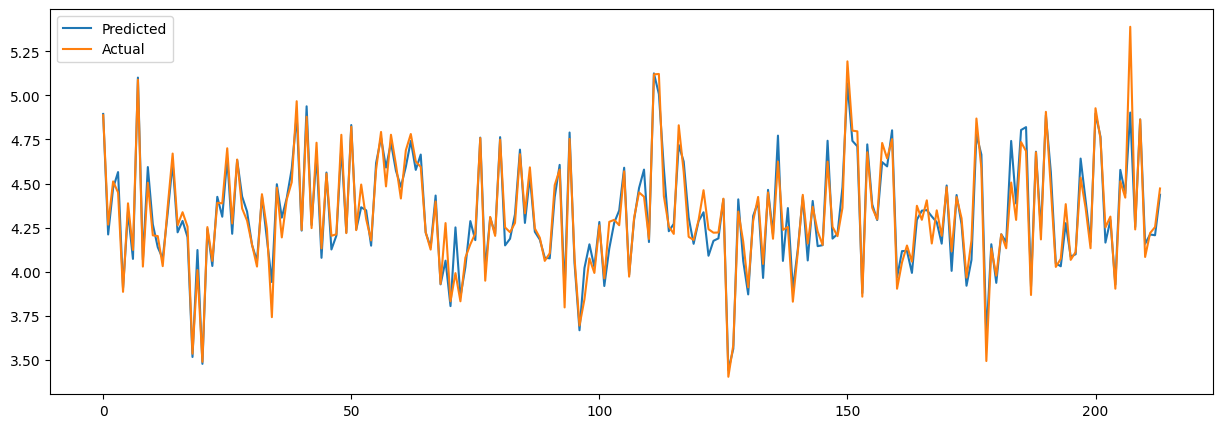

In [26]:
make_plot(y_test, y_pred)

In [27]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from interpret import show
from interpret.blackbox import LimeTabular
from interpret.blackbox import ShapKernel

In [28]:
lime = LimeTabular(predict_fn=rf.predict, data=X_train)
lime_local = lime.explain_local(X_test[:5], y_test[:5])

show(lime_local)

In [29]:
import lime
import lime.lime_tabular

In [33]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['thickness'], verbose=True, mode='regression')

In [35]:
exp = explainer.explain_instance(X_test.values[5], rf.predict, num_features=6)

Intercept 4.325338864267493
Prediction_local [4.32258699]
Right: 4.347014264610307


In [36]:
exp.show_in_notebook(show_table=True)

In [37]:
exp.as_list()

[('28.42 < 447 <= 46.02', -0.013491052804560952),
 ('256 <= 11.98', 0.012193245868796042),
 ('28.93 < 448 <= 47.01', -0.006960389665352818),
 ('100.03 < 214 <= 124.44', -0.006747661089507273),
 ('252 <= 13.16', 0.0062937481530819855),
 ('257 <= 11.47', 0.005960239912768156)]

In [39]:
import shap
explainer = shap.TreeExplainer(rf)
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

/home/ayush/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



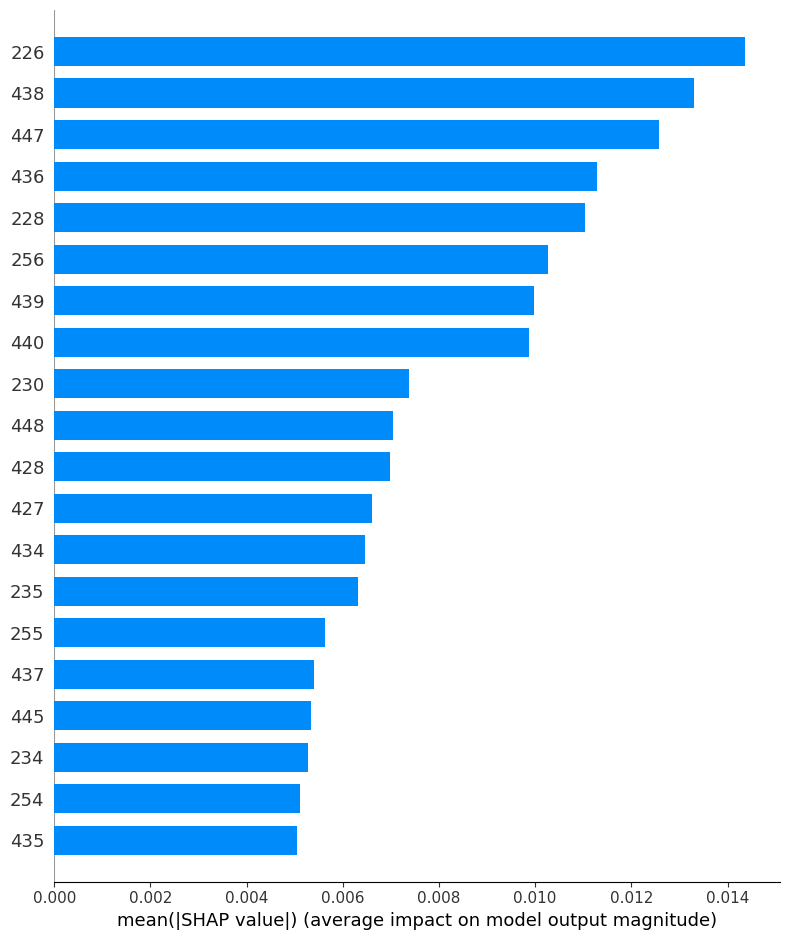

In [40]:
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


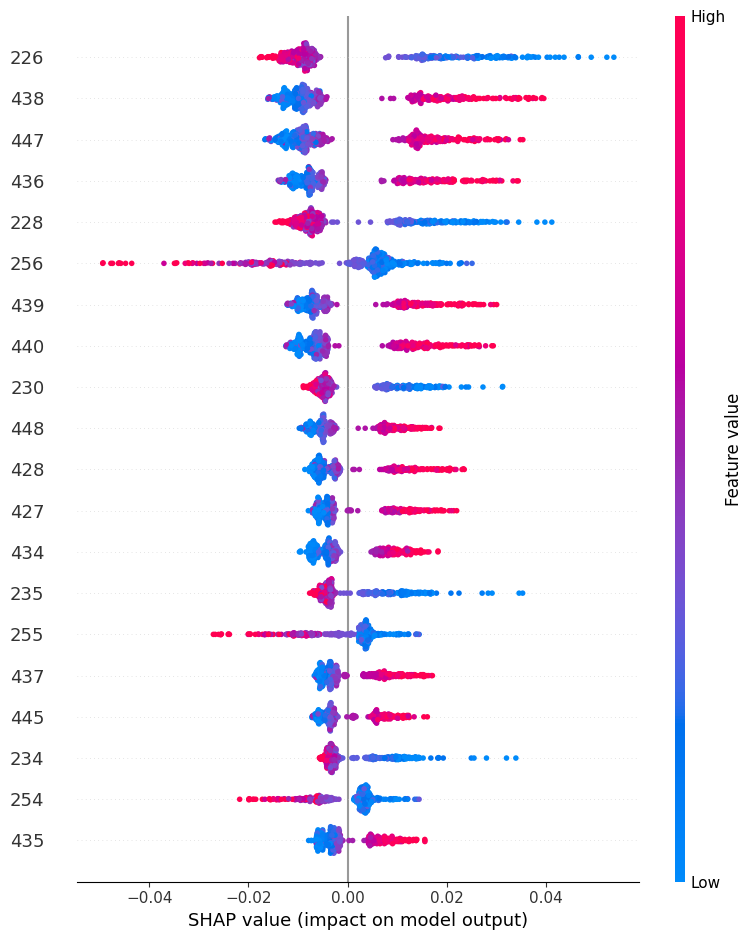

In [41]:
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)

In [53]:
shap.force_plot(explainer.expected_value[0], shap_values[0])

In [56]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[5, :],
    X_train.iloc[5, :],
)


In [48]:
X_train.shape

(497, 1000)

In [30]:
shap = ShapKernel(predict_fn=rf.predict, data=X_train)
shap_local = shap.explain_local(X_test[:5], y_test[:5])

show(shap_local)

/home/ayush/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

Using 497 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|████████████████████████████████████████████| 5/5 [10:14<00:00, 122.92s/it]


In [1]:
!pip3 install slisemap


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 706.9 kB/s eta 0:00:00MB/s eta 0:00:01


In [27]:
rf.feature_importances_

array([1.10891019e-04, 1.35598910e-04, 7.92901412e-05, 8.07936719e-05,
       4.31866424e-05, 6.24698157e-05, 1.40613289e-04, 1.01477331e-04,
       1.08432408e-04, 5.94862496e-05, 1.01234746e-04, 6.12265670e-05,
       6.20910991e-05, 8.68208486e-05, 8.88691304e-05, 4.75993213e-05,
       4.00689827e-05, 7.13696224e-05, 5.12294065e-05, 7.75583875e-05,
       6.53703701e-05, 8.87162230e-05, 8.68863406e-05, 7.47917765e-05,
       7.87505165e-05, 1.29251804e-04, 1.06917367e-04, 1.22621997e-04,
       8.43753787e-05, 1.28791278e-04, 1.13819500e-04, 7.19427012e-05,
       1.14483037e-04, 1.28366887e-04, 9.36471906e-05, 8.49725089e-05,
       5.82330711e-05, 8.79678074e-05, 1.07911440e-04, 1.00579225e-04,
       1.31185275e-04, 1.15292888e-04, 1.89395644e-04, 2.22817950e-04,
       2.91246560e-04, 3.53601323e-04, 1.75378219e-04, 1.93815077e-04,
       1.75161241e-04, 2.63989029e-04, 1.25472542e-04, 1.15884005e-04,
       1.42263970e-04, 1.11596023e-04, 8.64923725e-05, 8.47229392e-05,
      

In [74]:
from lazypredict.Supervised import LazyRegressor

In [75]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 55%|███████████████████████▌                   | 23/42 [03:51<03:44, 11.84s/it]

LassoLarsIC model failed to execute
You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.


 76%|████████████████████████████████          | 32/42 [13:36<29:01, 174.15s/it]

RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 497.


100%|███████████████████████████████████████████| 42/42 [14:20<00:00, 20.50s/it]


In [76]:
models

Adjusted R-Squared  \
Model                                                                              
QuantileRegressor             10043211367038153645267416946348263767194115537...   
SGDRegressor                                        1406113840646634954817536.00   
Lars                                                            2356154877172.03   
KernelRidge                                                                51.10   
GaussianProcessRegressor                                                   46.50   
LinearRegression                                                            2.38   
TransformedTargetRegressor                                                  2.38   
Lasso                                                                       1.27   
LassoLars                                                                   1.27   
DummyRegressor                                                              1.27   
ElasticNet                                                                  1.27   
MLPRegressor                                                                1.19   
LarsCV                                                                      1.16   
ExtraTreeRegressor                                                          1.09   
DecisionTreeRegressor                                                       1.07   
OrthogonalMatchingPursuit                                                   1.04   
LinearSVR                                                                   1.04   
OrthogonalMatchingPursuitCV                                                 1.04   
PassiveAggressiveRegressor                                                  1.04   
GammaRegressor                                                              1.03   
TweedieRegressor                                                            1.03   
BaggingRegressor                                                            1.03   
LassoLarsCV                                                                 1.03   
ElasticNetCV                                                                1.03   
LassoCV                                                                     1.03   
HuberRegressor                                                              1.03   
PoissonRegressor                                                            1.03   
RandomForestRegressor                                                       1.03   
BayesianRidge                                                               1.03   
XGBRegressor                                                                1.02   
KNeighborsRegressor                                                         1.02   
Ridge                                                                       1.02   
RidgeCV                                                                     1.02   
GradientBoostingRegressor                                                   1.02   
ExtraTreesRegressor                                                         1.02   
AdaBoostRegressor                                                           1.02   
HistGradientBoostingRegressor                                               1.02   
SVR                                                                         1.02   
LGBMRegressor                                                               1.02   
NuSVR                                                                       1.01   

                                                                       R-Squared  \
Model                                                                              
QuantileRegressor             -3710801570825834223683526525040227552952848714...   
SGDRegressor                                       -5195359589619256659017728.00   
Lars                                                           -8705605109546.41   
KernelRidge                                                              -184.09   
GaussianProcessRegressor     

In [22]:
lgbm = lgb.LGBMRegressor(n_jobs=-1, n_estimators=1000, num_leaves=3500)

In [23]:
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

In [24]:
calculate_metrics(y_test, y_pred)

 R2 of the model is  0.9253123748293983
 RMSE of the model is  0.08700474379772327
 MAE of the model is  0.0542507554054039
 MAPE of the model is  0.012460687860676686


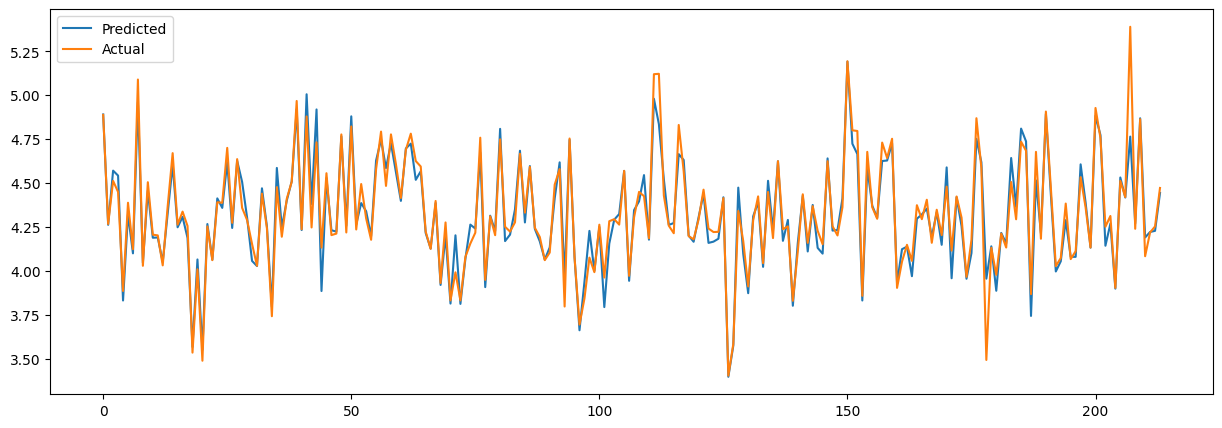

In [26]:
make_plot(y_test, y_pred)